In [1]:
import numpy as np
import matplotlib.pylab as plt
import matti_func as matti

n=1.5
fs = 15
col = ['blue', 'red', 'green', 'orange', 'purple', 'dimgrey']
lin = ['-', (0,(3,3,1,3)), (0,(1,1)), (5,(10,3)), (0,(3,3,1,3,1,3)), (0,(5,5))]
lw = 2  # plt default: 1.5

SAVE = False;
direc = "/home/matti/Documents/data/benchmark_ist/first_try/"
GPUN = [1,2,4,8]
Ns = [2048, 8192, 16384, 32768, 65536, 131072]

In [2]:
def read_scal_ist(N):
    name = direc + str(N) + "/"
    err = []
    tprof = []
    for i in GPUN:
        #questo legge le due colonne t e de/e per ogni numero di gpu. li mette nella lista err
        with open(name + str(i) + "gpu/output/diagnostic.dat") as f:
            file=f.readlines()
            file.pop(0)
            err.append(np.loadtxt(file,  usecols=(0,1)))
        #questo legge la penultima riga del time_prof_cumul. le mette nella lista tprof
        with open(name + str(i) + "gpu/logfiles/timeprofile.dat.cumul") as f:
            tprof.append(np.loadtxt([f.readlines()[-2]]))
    return err, np.array(tprof)

with open(direc + "2048/1gpu/logfiles/timeprofile.dat.cumul") as f:
    profname = f.readlines()[-1].strip().split()
for i in range(len(profname)):
    print("{} : {}".format(i,profname[i]))

# err2048, tprof2048 = read_scal_ist(2048)
# err8192, tprof8192 = read_scal_ist(8192)
# err16384, tprof16384 = read_scal_ist(16384)
# err32768, tprof32768 = read_scal_ist(32768)
# err65536, tprof65536 = read_scal_ist(65536)
# err131072, tprof131072 = read_scal_ist(131072)
lista = []
lista.append(read_scal_ist(2048))
lista.append(read_scal_ist(8192))
lista.append(read_scal_ist(16384))
lista.append(read_scal_ist(32768))
lista.append(read_scal_ist(65536))
lista.append(read_scal_ist(131072))

0 : Nsteps
1 : INIT
2 : oldI-forces
3 : EVAL-buildtree
4 : I-forces
5 : ANN-tree
6 : ANN-transfers
7 : ANN-treeonly
8 : ANN-searchonly
9 : PERSTEP
10 : ActivePart
11 : AdvanceStep
12 : predictor
13 : PRED-Jpart
14 : evaluation
15 : EVAL-kernelI
16 : EVAL-kernelN
17 : EVAL-acc3corr
18 : EVAL-red
19 : EVAL-mpi
20 : corrector
21 : CORR-kernelGPU
22 : UpdateDT
23 : prints


In [3]:
print(lista[-1][1][:,4] / lista[-1][1][-1,4])
print(lista[-1][1][:,4])
print(lista[-1][1][:,16] / lista[-1][1][-1,16])
print(lista[-1][1][:,16])

[7.74752533 3.91188343 1.91231053 1.        ]
[925.132 467.118 228.349 119.41 ]
[2.64895019 1.88405684 1.51409105 1.        ]
[23.8134  16.9372  13.6113   8.98975]


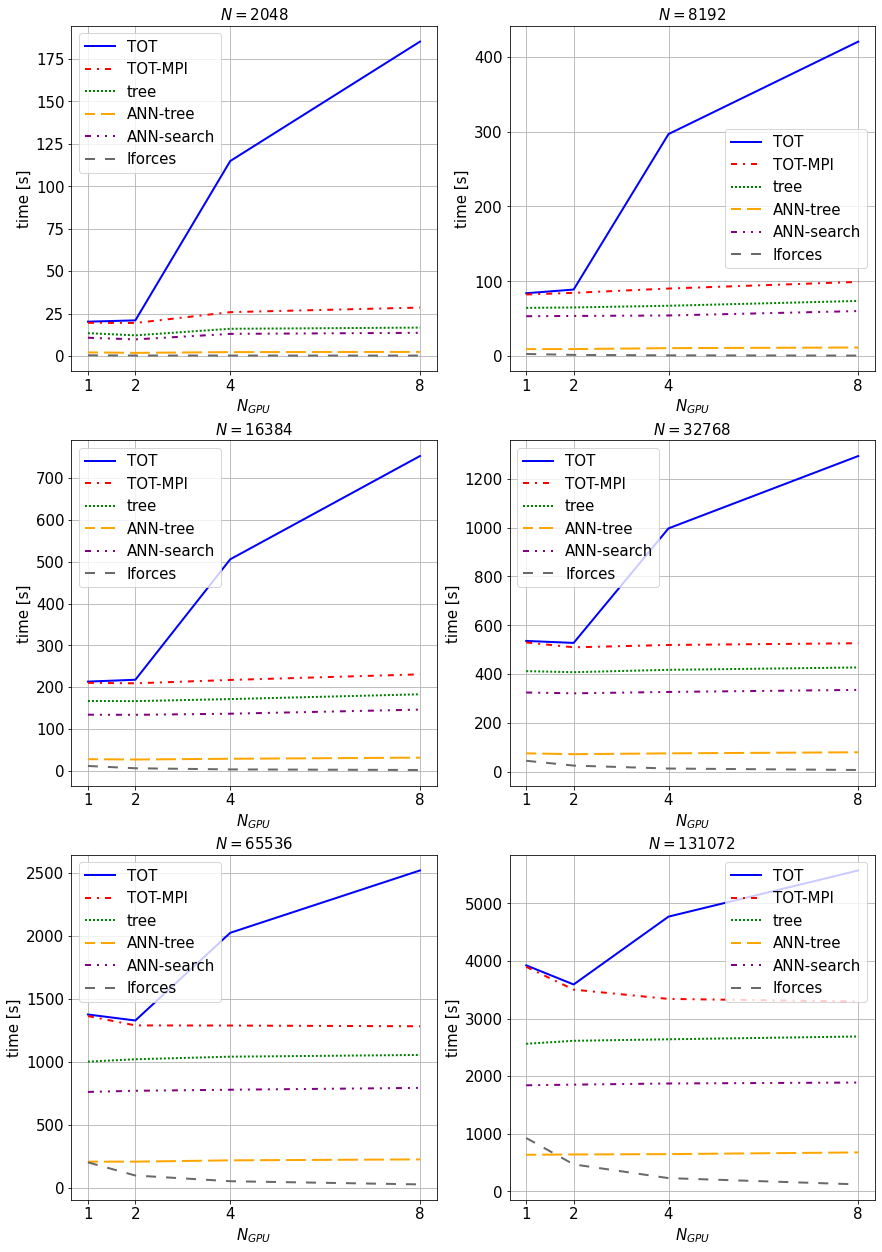

In [3]:
def plot_scal_N(i, ax):
    j = 0
    _ = ax.plot(GPUN, lista[i][1][:,9], linestyle=lin[j], linewidth=lw, color=col[j], label = 'TOT'); j+=1
    _ = ax.plot(GPUN, lista[i][1][:,9]-lista[i][1][:,19], linestyle=lin[j], linewidth=lw, color=col[j], label = 'TOT-MPI'); j+=1
    _ = ax.plot(GPUN, lista[i][1][:,3], linestyle=lin[j], linewidth=lw, color=col[j], label = 'tree'); j+=1
    # _ = ax.plot(GPUN, lista[i][1][:,6], linestyle=lin[j], linewidth=lw, color=col[j], label = 'ANN-trans'); j+=1
    _ = ax.plot(GPUN, lista[i][1][:,7], linestyle=lin[j], linewidth=lw, color=col[j], label = 'ANN-tree'); j+=1
    _ = ax.plot(GPUN, lista[i][1][:,8], linestyle=lin[j], linewidth=lw, color=col[j], label = 'ANN-search'); j+=1
    _ = ax.plot(GPUN, lista[i][1][:,4], linestyle=lin[j], linewidth=lw, color=col[j], label = 'Iforces'); j+=1
    # _ = ax.plot(GPUN, lista[i][1][:,12], linestyle=lin[j], linewidth=lw, color=col[j], label = 'predictor'); j+=1
    # _ = ax.plot(GPUN, lista[i][1][:,20], linestyle=lin[j], linewidth=lw, color=col[j], label = 'corrector'); j+=1
    # _ = ax.plot(GPUN, lista[i][1][:,14]-lista[i][1][:,19], linestyle=lin[j], linewidth=lw, color=col[j], label = 'eva-MPI'); j+=1
    # _ = ax.set_yscale("log", base=10)
    _ = ax.set_xlabel(r'$N_{GPU}$', fontsize=fs)
    _ = ax.set_ylabel(r'time [s]', fontsize=fs)
    _ = ax.set_xticks(ticks=GPUN)
    _ = ax.legend(fontsize=fs)
    _ = ax.set_title(r'$N=%d$'%Ns[i],fontsize=fs)
    _ = ax.tick_params(axis='both', labelsize=fs)
    _ = ax.grid()
        
fig = plt.figure(666, figsize=[n*4.8*2,n*4.8*3])
gs = fig.add_gridspec(3,2)#, hspace=0)
axs = gs.subplots()#sharex=True, sharey=True)
plot_scal_N(0, axs[0,0])
plot_scal_N(1, axs[0,1])
plot_scal_N(2, axs[1,0])
plot_scal_N(3, axs[1,1])
plot_scal_N(4, axs[2,0])
plot_scal_N(5, axs[2,1])

if(SAVE):
    _ = plt.savefig(direc+"scalN.pdf", bbox_inches='tight', format='pdf')
    _ = plt.show(True)

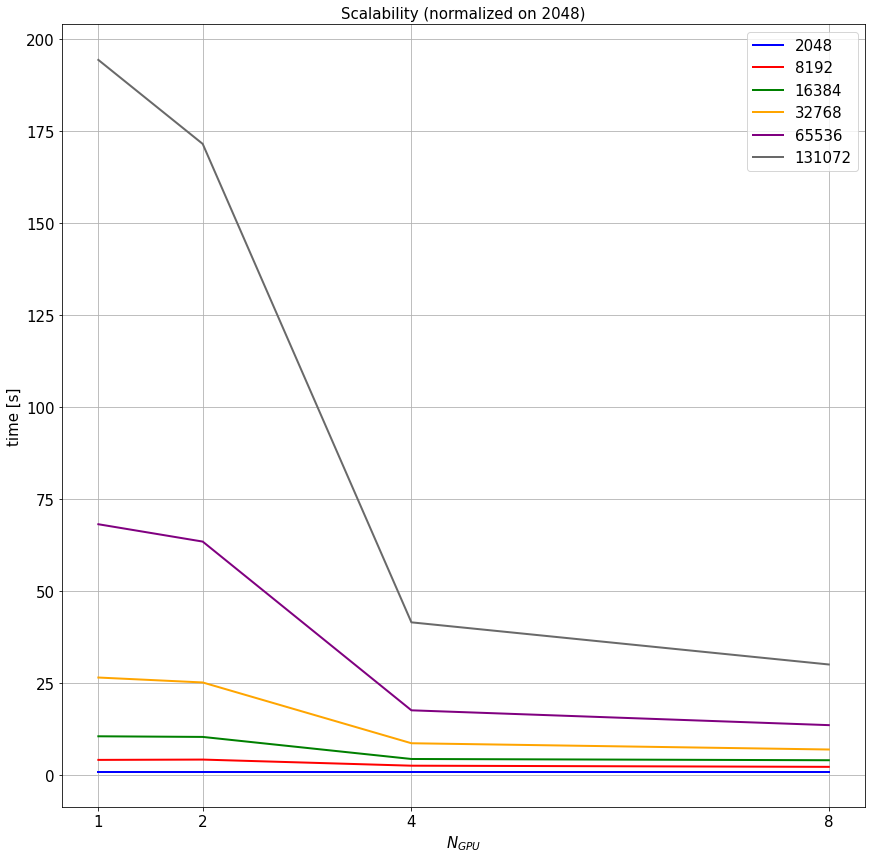

In [77]:
def plot_scal(i):
    for i in range(len(Ns)):
        _ = ax.plot(GPUN, np.array(lista[i][1][:,9]) / np.array(lista[0][1][:,9]), linestyle=lin[0], linewidth=lw, color=col[i], label = '%d'%Ns[i])
        # _ = ax.plot(GPUN, lista[i][1][:,19], linestyle=lin[1], linewidth=lw, color=col[1], label = 'MPI')
        # _ = ax.plot(GPUN, (lista[i][1][:,9]-lista[i][1][:,19])/ lista[i][1][3,9], linestyle=lin[1], linewidth=lw, color=col[i])#, label = 'TOT-MPI %d'%Ns[i])
        # _ = ax.plot(GPUN, lista[i][1][:,11], linestyle=lin[3], linewidth=lw, color=col[3], label = 'advancestep')
        # _ = ax.set_yscale("log", base=10)
    _ = ax.set_xlabel(r'$N_{GPU}$', fontsize=fs)
    _ = ax.set_ylabel(r'time [s]', fontsize=fs)
    _ = ax.set_xticks(ticks=GPUN)
    _ = ax.legend(fontsize=fs)
    _ = ax.set_title(r'Scalability (normalized on 2048)',fontsize=fs)
    _ = ax.tick_params(axis='both', labelsize=fs)
    _ = ax.grid()
        
fig = plt.figure(999, figsize=[n*4.8*2,n*4.8*2])
ax = fig.subplots()#sharex=True, sharey=True)
plot_scal(ax)

if(SAVE):
    _ = plt.savefig(direc+"scalN.pdf", bbox_inches='tight', format='pdf')
    _ = plt.show(True)